In [14]:
import math   ## importing the required libraries
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [15]:
n = int(input('degree of the polynomial to be fitted: ')) # enter the degree of the polynomial that you want to fit

degree of the polynomial to be fitted: 3


In [16]:
x= [0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45,
    0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1]
y= [0.486, 0.866, 0.944, 1.144, 1.103, 1.202, 1.166, 1.191, 1.124,1.095,
    1.122, 1.102, 1.099, 1.017, 1.111, 1.117, 1.152, 1.265, 1.38, 1.575, 1.857]
delta_y=[0.052, 0.04, 0.056, 0.076, 0.016, 0.072, 0.028, 0.008, 0.04, 
         0.068, 0.072, 0.004, 0.08, 0.02, 0.052, 0.008, 0.024, 0.048,0.036, 0.064, 0.02]
w=[1/(i)**2 for i in delta_y]

In [17]:
N= len(x) # calculate the number of points taken
print(N)

21


In [18]:
sum_list=[]
Y_list=[]
for i in range (2*n+1):
    sum=0
    Y=0
    for j in range (0,N):
        sum+= (x[j]**i)*w[j]
    for k in range (0,N):
        Y+= (x[k]**i)*y[k]*w[k]
    sum_list.append(sum) # list whose elements are sum(i), sum(xi), sum(xi^2),...soon
    Y_list.append(Y) # list whose elements are sum(yi), sum(xiyi), sum(xi^2*yi),....soon
    
print(sum_list)
print(Y_list)

[110357.6128164969, 60469.3208882781, 36156.888624007595, 23088.07792094667, 15649.934385001729, 11226.836143112445, 8495.955610621186]
[125106.98712251846, 69508.97320466416, 42341.75676944155, 27778.736261749356, 19500.112049926473, 14574.568082896823, 11527.147135110074]


In [19]:
matM =np.zeros((n+1,n+1))
matY =np.zeros(n+1)
matA = np.zeros(n+1)

In [20]:
for i in range(n+1):
    for j in range(n+1):
        matM[i][j] = sum_list[j+i]
print(matM) # matrix of M in MA=Y form of equation (matrix of xis)

[[110357.6128165   60469.32088828  36156.88862401  23088.07792095]
 [ 60469.32088828  36156.88862401  23088.07792095  15649.934385  ]
 [ 36156.88862401  23088.07792095  15649.934385    11226.83614311]
 [ 23088.07792095  15649.934385    11226.83614311   8495.95561062]]


In [21]:
for i in range(n+1):
    matY[i]=Y_list[i]
print(matY) # matrix on R.H.S. of the equation

[125106.98712252  69508.97320466  42341.75676944  27778.73626175]


In [22]:
# program for LU decomposition
lowerM=np.zeros((n+1,n+1))
upperM=np.zeros((n+1,n+1))
P=np.zeros(n+1)
for i in range(n+1):
    for j in range(i,n+1):
        sum = 0;
        for k in range (i):
            sum+=(lowerM[i][k])*(upperM[k][j]);
        upperM[i][j]=matM[i][j]-sum;
    for j in range(i,n+1):
        if(i==j):
            lowerM[i][i]=1;
        else:
            sum = 0
            for k in range (i):
                sum+=(lowerM[j][k])*(upperM[k][i]);
            lowerM[j][i]=(matM[j][i]-sum)/upperM[i][i];
            
print(lowerM)
print(upperM)
            

[[1.         0.         0.         0.        ]
 [0.54793973 1.         0.         0.        ]
 [0.32763384 1.08366129 1.         0.        ]
 [0.20921147 0.99196719 1.62803287 1.        ]]
[[1.10357613e+05 6.04693209e+04 3.61568886e+04 2.30880779e+04]
 [0.00000000e+00 3.02334509e+03 3.27628203e+03 2.99905914e+03]
 [0.00000000e+00 0.00000000e+00 2.53334076e+02 4.12436202e+02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 1.92370300e+01]]


In [23]:
for i in range (n+1):
    P[i]=matY[i]/lowerM[i][i];      
    for j in range(0,i):
        P[i]=P[i]-(lowerM[i][j]*P[j])/lowerM[i][i];
print(P)

[125106.98712252    957.88409895    314.45206775    142.79222417]


In [24]:
for i in range (n,-1,-1):
    matA[i]=P[i]/upperM[i][i];
    for j in range (i+1, n+1):
        matA[i]=matA[i]-(upperM[i][j]*matA[j])/upperM[i][i];
print(matA)  ## final matrix obtained after LU decom. and substitution, it's elements are the required coefficients

[  0.55577384   4.70411194 -10.84327381   7.42277909]


In [25]:
delx=(x[-1] - x[0])/100
delx1=x[0]
X=[delx1]
for i in range (0,100,1):
    delx1+=delx
    X.append(delx1)
funcvalues=[]
for xi in X:
    funcvalue=0
    for i in range (0,n+1):
         funcvalue+= matA[i]*(xi**i)
    funcvalues.append(funcvalue) ## funcvalues have values of best fit curve of nth degree

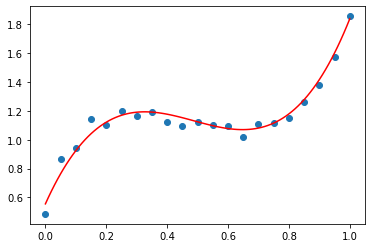

In [26]:
plt.plot(x, y, 'o') # plots the points
plt.plot(X, funcvalues, 'r')# plots the best fit curve